# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        
    </li>
    <li> Here in response encoding you need to apply the <strong>laplase smoothing</strong> value for test set. Laplase smoothing means, If test point is present in test but not in train then you need to apply default 0.5 as probability value for that data point (Refer the Response Encoding Image from above cell) </li>
    <li>Please use atleast <strong> 35k </strong> data points </li></ul>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

# Few Notes

1. Use atleast 35k data points
2. Use classifier.Predict_proba() method instead of predict() method while calculating roc_auc scores
3. Be sure that you are using laplase smoothing in response encoding function. Laplase smoothing means applying the default (0.5) value to test data if the test data is not present in the train set


In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [5]:
import pandas as pd
data = pd.read_csv('preprocessed_data.csv')
titles = pd.read_csv('preprocessed_titles.csv')

In [6]:
data = pd.concat([data,titles],axis = 1)
data = data.fillna('')

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [7]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)    

In [8]:
from scipy.sparse import csr_matrix
from tqdm import tqdm

sid = SentimentIntensityAnalyzer()

li = ['neg','neu','pos','compound']
data_list = [X_train,X_cv,X_test]

sentiment_data_list = []


for item_indx,item in enumerate(data_list):
    rows = []
    columns = []
    sentiment_scores = list()
    for rw_index,i in enumerate(tqdm(item['essay'].values.tolist())):
        val = sid.polarity_scores(i)
        for col_index,n in enumerate(li):
            sentiment_scores.append(val[n])
            #print(col_index)
            columns.append(col_index)
            rows.append(rw_index)
    print(item_indx)        
    sentiment_data_list.append(csr_matrix((sentiment_scores,(rows,columns)),shape=(len(item),len(li))))        

  0%|          | 45/24155 [00:00<00:55, 435.21it/s]

0


  0%|          | 58/36052 [00:00<01:02, 575.27it/s]

1


100%|██████████| 36052/36052 [00:59<00:00, 609.74it/s]

2


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tfidf_model_essay = TfidfVectorizer()
tfidf_model_essay.fit(data['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_essay = dict(zip(tfidf_model_essay.get_feature_names(), list(tfidf_model_essay.idf_)))
tfidf_words_essay = set(tfidf_model_essay.get_feature_names())

tfidf_model_title = TfidfVectorizer()
tfidf_model_title.fit(data['titles'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_title = dict(zip(tfidf_model_title.get_feature_names(), list(tfidf_model_title.idf_)))
tfidf_words_title = set(tfidf_model_title.get_feature_names())

In [10]:
import pickle
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [11]:
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price', 'titles'],
      dtype='object')

In [12]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
import os

from collections import Counter

# Apply TF-IDF vectorization on 'Preprocessed_Essay' 

vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['essay'].values)
X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)
print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

# Apply TF-IDF vectorization on 'Preprocessed_Title' 
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['titles'].values)
X_train_titles_tfidf = vectorizer.transform(X_train['titles'].values)
X_cv_titles_tfidf = vectorizer.transform(X_cv['titles'].values)
X_test_titles_tfidf = vectorizer.transform(X_test['titles'].values)

# Apply TF-IDF W2V vectorization on 'Preprocessed_Essay'

tfidf_w2v_vectors_tr_essay = []; # the avg-w2v for each sentence/review is stored in this list
tfidf_w2v_vectors_cv_essay = [];
tfidf_w2v_vectors_te_essay = [];
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essay):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_essay[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_tr_essay.append(vector)
    
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essay):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_essay[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv_essay.append(vector)
    
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_essay):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_essay[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_te_essay.append(vector)

    
# Apply TF-IDF W2V vectorization on 'Preprocessed_Title'

tfidf_w2v_vectors_tr_title = []; # the avg-w2v for each sentence/review is stored in this list
tfidf_w2v_vectors_cv_title = [];
tfidf_w2v_vectors_te_title = [];

for sentence in tqdm(X_train['titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_title[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_tr_title.append(vector)
    
for sentence in tqdm(X_cv['titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_title[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_cv_title.append(vector)
    
for sentence in tqdm(X_test['titles'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_title[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_te_title.append(vector)
    

print(len(tfidf_w2v_vectors_tr_essay))
print(len(tfidf_w2v_vectors_cv_essay))
print(len(tfidf_w2v_vectors_te_essay))
print(len(tfidf_w2v_vectors_tr_essay[0]))



After vectorizations
(49041, 12174) (49041,)
(24155, 12174) (24155,)
(36052, 12174) (36052,)


100%|██████████| 36052/36052 [00:00<00:00, 39176.25it/s]

49041
24155
36052
300


In [13]:
def transform(x):
    try:
        n = tot_dict[x[0]]
    except Exception as e:
        print(e)
        return 0.5
    return dict_label_1[x[0]]/tot_dict[x[0]] if x[1] ==1 else dict_label_0[x[0]]/tot_dict[x[0]]

In [14]:
# For School_state
y_tr_df = pd.DataFrame(columns = ['label'],data = y_train)
X_resp_df = pd.concat([X_train['school_state'].reset_index(),y_tr_df],axis = 1).reset_index()
X_resp_df = X_resp_df[['school_state','label']]
X_resp_df_1 = X_resp_df[X_resp_df['label'] == 1]
X_resp_df_0 = X_resp_df[X_resp_df['label'] == 0]
li = X_resp_df['school_state'].unique().tolist()
tot_dict = dict(zip(li,[X_resp_df[X_resp_df['school_state']==x].shape[0] for x in li]))
dict_label_1  = dict(zip(li,[X_resp_df_1[X_resp_df_1['school_state']==x].shape[0] for x in li]))
dict_label_0  = dict(zip(li,[X_resp_df_0[X_resp_df_0['school_state']==x].shape[0] for x in li]))
X_train_state_respcod = pd.DataFrame()
X_train_state_respcod['school_state'] = X_resp_df.apply(lambda x : transform(x),axis = 1)

y_cv_df = pd.DataFrame(columns = ['label'],data = y_cv)
X_resp_df = pd.concat([X_cv['school_state'].reset_index(),y_cv_df],axis = 1).reset_index()
X_resp_df = X_resp_df[['school_state','label']]

X_cv_state_respcod = pd.DataFrame()
X_cv_state_respcod['school_state'] = X_resp_df.apply(lambda x : transform(x),axis = 1)

y_test_df = pd.DataFrame(columns = ['label'],data = y_test)
X_resp_df = pd.concat([X_test['school_state'].reset_index(),y_test_df],axis = 1).reset_index()
X_resp_df = X_resp_df[['school_state','label']]

X_test_state_respcod = pd.DataFrame()
X_test_state_respcod['school_state'] = X_resp_df.apply(lambda x : transform(x),axis = 1)

In [15]:
# For teacher_prefix
y_tr_df = pd.DataFrame(columns = ['label'],data = y_train)
X_resp_df = pd.concat([X_train['teacher_prefix'].reset_index(),y_tr_df],axis = 1).reset_index()
X_resp_df = X_resp_df[['teacher_prefix','label']]
X_resp_df_1 = X_resp_df[X_resp_df['label'] == 1]
X_resp_df_0 = X_resp_df[X_resp_df['label'] == 0]
li = X_resp_df['teacher_prefix'].unique().tolist()
tot_dict = dict(zip(li,[X_resp_df[X_resp_df['teacher_prefix']==x].shape[0] for x in li]))
dict_label_1  = dict(zip(li,[X_resp_df_1[X_resp_df_1['teacher_prefix']==x].shape[0] for x in li]))
dict_label_0  = dict(zip(li,[X_resp_df_0[X_resp_df_0['teacher_prefix']==x].shape[0] for x in li]))
X_train_teacher_respcod = pd.DataFrame()
X_train_teacher_respcod['teacher_prefix'] = X_resp_df.apply(lambda x : transform(x),axis = 1)

y_cv_df = pd.DataFrame(columns = ['label'],data = y_cv)
X_resp_df = pd.concat([X_cv['teacher_prefix'].reset_index(),y_cv_df],axis = 1).reset_index()
X_resp_df = X_resp_df[['teacher_prefix','label']]

X_cv_teacher_respcod = pd.DataFrame()
X_cv_teacher_respcod['teacher_prefix'] = X_resp_df.apply(lambda x : transform(x),axis = 1)

y_test_df = pd.DataFrame(columns = ['label'],data = y_test)
X_resp_df = pd.concat([X_test['teacher_prefix'].reset_index(),y_test_df],axis = 1).reset_index()
X_resp_df = X_resp_df[['teacher_prefix','label']]

X_test_teacher_respcod = pd.DataFrame()
X_test_teacher_respcod['teacher_prefix'] = X_resp_df.apply(lambda x : transform(x),axis = 1)

In [16]:
y_tr_df = pd.DataFrame(columns = ['label'],data = y_train)
X_resp_df = pd.concat([X_train['project_grade_category'].reset_index(),y_tr_df],axis = 1).reset_index()
X_resp_df = X_resp_df[['project_grade_category','label']]
X_resp_df_1 = X_resp_df[X_resp_df['label'] == 1]
X_resp_df_0 = X_resp_df[X_resp_df['label'] == 0]
li = X_resp_df['project_grade_category'].unique().tolist()
tot_dict = dict(zip(li,[X_resp_df[X_resp_df['project_grade_category']==x].shape[0] for x in li]))
dict_label_1  = dict(zip(li,[X_resp_df_1[X_resp_df_1['project_grade_category']==x].shape[0] for x in li]))
dict_label_0  = dict(zip(li,[X_resp_df_0[X_resp_df_0['project_grade_category']==x].shape[0] for x in li]))
X_train_grade_respcod = pd.DataFrame()
X_train_grade_respcod['project_grade_category'] = X_resp_df.apply(lambda x : transform(x),axis = 1)

y_cv_df = pd.DataFrame(columns = ['label'],data = y_cv)
X_resp_df = pd.concat([X_cv['project_grade_category'].reset_index(),y_cv_df],axis = 1).reset_index()
X_resp_df = X_resp_df[['project_grade_category','label']]

X_cv_grade_respcod = pd.DataFrame()
X_cv_grade_respcod['project_grade_category'] = X_resp_df.apply(lambda x : transform(x),axis = 1)

y_test_df = pd.DataFrame(columns = ['label'],data = y_test)
X_resp_df = pd.concat([X_test['project_grade_category'].reset_index(),y_test_df],axis = 1).reset_index()
X_resp_df = X_resp_df[['project_grade_category','label']]

X_test_grade_respcod = pd.DataFrame()
X_test_grade_respcod['project_grade_category'] = X_resp_df.apply(lambda x : transform(x),axis = 1)

In [17]:
y_tr_df = pd.DataFrame(columns = ['label'],data = y_train)
X_resp_df = pd.concat([X_train['clean_categories'].reset_index(),y_tr_df],axis = 1).reset_index()
X_resp_df = X_resp_df[['clean_categories','label']]
X_resp_df_1 = X_resp_df[X_resp_df['label'] == 1]
X_resp_df_0 = X_resp_df[X_resp_df['label'] == 0]
li = X_resp_df['clean_categories'].unique().tolist()
tot_dict = dict(zip(li,[X_resp_df[X_resp_df['clean_categories']==x].shape[0] for x in li]))
dict_label_1  = dict(zip(li,[X_resp_df_1[X_resp_df_1['clean_categories']==x].shape[0] for x in li]))
dict_label_0  = dict(zip(li,[X_resp_df_0[X_resp_df_0['clean_categories']==x].shape[0] for x in li]))
X_train_clean_respcod = pd.DataFrame()
X_train_clean_respcod['clean_categories'] = X_resp_df.apply(lambda x : transform(x),axis = 1)

y_cv_df = pd.DataFrame(columns = ['label'],data = y_cv)
X_resp_df = pd.concat([X_cv['clean_categories'].reset_index(),y_cv_df],axis = 1).reset_index()
X_resp_df = X_resp_df[['clean_categories','label']]

X_cv_clean_respcod = pd.DataFrame()
X_cv_clean_respcod['clean_categories'] = X_resp_df.apply(lambda x : transform(x),axis = 1)

y_test_df = pd.DataFrame(columns = ['label'],data = y_test)
X_resp_df = pd.concat([X_test['clean_categories'].reset_index(),y_test_df],axis = 1).reset_index()
X_resp_df = X_resp_df[['clean_categories','label']]

X_test_clean_respcod = pd.DataFrame()
X_test_clean_respcod['clean_categories'] = X_resp_df.apply(lambda x : transform(x),axis = 1)

'music_arts warmth care_hunger'
'music_arts warmth care_hunger'


In [18]:
y_tr_df = pd.DataFrame(columns = ['label'],data = y_train)
X_resp_df = pd.concat([X_train['clean_subcategories'].reset_index(),y_tr_df],axis = 1).reset_index()
X_resp_df = X_resp_df[['clean_subcategories','label']]
X_resp_df_1 = X_resp_df[X_resp_df['label'] == 1]
X_resp_df_0 = X_resp_df[X_resp_df['label'] == 0]
li = X_resp_df['clean_subcategories'].unique().tolist()
tot_dict = dict(zip(li,[X_resp_df[X_resp_df['clean_subcategories']==x].shape[0] for x in li]))
dict_label_1  = dict(zip(li,[X_resp_df_1[X_resp_df_1['clean_subcategories']==x].shape[0] for x in li]))
dict_label_0  = dict(zip(li,[X_resp_df_0[X_resp_df_0['clean_subcategories']==x].shape[0] for x in li]))
X_train_clean_sub_respcod = pd.DataFrame()
X_train_clean_sub_respcod['clean_subcategories'] = X_resp_df.apply(lambda x : transform(x),axis = 1)

y_cv_df = pd.DataFrame(columns = ['label'],data = y_cv)
X_resp_df = pd.concat([X_cv['clean_subcategories'].reset_index(),y_cv_df],axis = 1).reset_index()
X_resp_df = X_resp_df[['clean_subcategories','label']]

X_cv_clean_sub_respcod = pd.DataFrame()
X_cv_clean_sub_respcod['clean_subcategories'] = X_resp_df.apply(lambda x : transform(x),axis = 1)

y_test_df = pd.DataFrame(columns = ['label'],data = y_test)
X_resp_df = pd.concat([X_test['clean_subcategories'].reset_index(),y_test_df],axis = 1).reset_index()
X_resp_df = X_resp_df[['clean_subcategories','label']]

X_test_clean_sub_respcod = pd.DataFrame()
X_test_clean_sub_respcod['clean_subcategories'] = X_resp_df.apply(lambda x : transform(x),axis = 1)

'economics nutritioneducation'
'earlydevelopment teamsports'
'parentinvolvement performingarts'
'earlydevelopment teamsports'
'charactereducation financialliteracy'
'college_careerprep teamsports'
'visualarts warmth care_hunger'
'extracurricular socialsciences'
'earlydevelopment economics'
'parentinvolvement warmth care_hunger'
'parentinvolvement performingarts'
'communityservice financialliteracy'
'financialliteracy health_wellness'
'esl teamsports'
'parentinvolvement performingarts'
'civics_government teamsports'
'literacy warmth care_hunger'
'civics_government teamsports'
'extracurricular socialsciences'
'communityservice music'
'earlydevelopment teamsports'
'financialliteracy foreignlanguages'
'esl economics'
'earlydevelopment economics'
'financialliteracy health_wellness'
'civics_government foreignlanguages'
'charactereducation financialliteracy'
'earlydevelopment teamsports'
'literacy warmth care_hunger'
'literacy warmth care_hunger'
'college_careerprep teamsports'
'parentinvolve

In [19]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(X_train.shape[0],1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(X_train.shape[0],-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(X_cv.shape[0],-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(X_test.shape[0],-1))

normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(X_train.shape[0],1))

X_train_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(X_train.shape[0],-1))
X_cv_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(X_cv.shape[0],-1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(X_test.shape[0],-1))

numerical = ['Price','teacher_number_of_previously_posted_projects']

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


In [20]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot
from scipy.sparse import hstack
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

X_tr = hstack((X_train_essay_tfidf, X_train_titles_tfidf, X_train_state_respcod, X_train_teacher_respcod, X_train_grade_respcod,X_train_clean_respcod,X_train_clean_sub_respcod, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm,sentiment_data_list[0])).tocsr()
X_cr = hstack((X_cv_essay_tfidf,X_cv_titles_tfidf, X_cv_state_respcod, X_cv_teacher_respcod, X_cv_grade_respcod,X_cv_clean_respcod,X_cv_clean_sub_respcod, X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects_norm,sentiment_data_list[1])).tocsr()
X_te = hstack((X_test_essay_tfidf,X_test_titles_tfidf, X_test_state_respcod, X_test_teacher_respcod, X_test_grade_respcod,X_test_clean_respcod,X_test_clean_sub_respcod, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,sentiment_data_list[2])).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)



Final Data matrix
(49041, 14200) (49041,)
(24155, 14200) (24155,)
(36052, 14200) (36052,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [21]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.ensemble import GradientBoostingClassifier

train_auc = []
cv_auc = []
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
depth = [1, 3, 10, 30]
estimators=[5,10,50, 75, 100, 200]
#learning = [0.001,0.01,0.1,1,10]
for j in estimators:
    for i in tqdm(learning_rate):
        clf = GradientBoostingClassifier(n_estimators=j, learning_rate=i)
        clf.fit(X_tr,y_train)
        y_train_pred = clf.predict_proba(X_tr)[:,1]

        y_cv_pred = clf.predict_proba(X_cr)[:,1]
        train_auc.append(roc_auc_score(y_train,y_train_pred))
        cv_auc.append(roc_auc_score(y_cv, y_cv_pred))   

100%|██████████| 6/6 [18:04<00:00, 180.68s/it]


In [22]:
y_train_pred

array([1., 1., 1., ..., 1., 1., 1.])

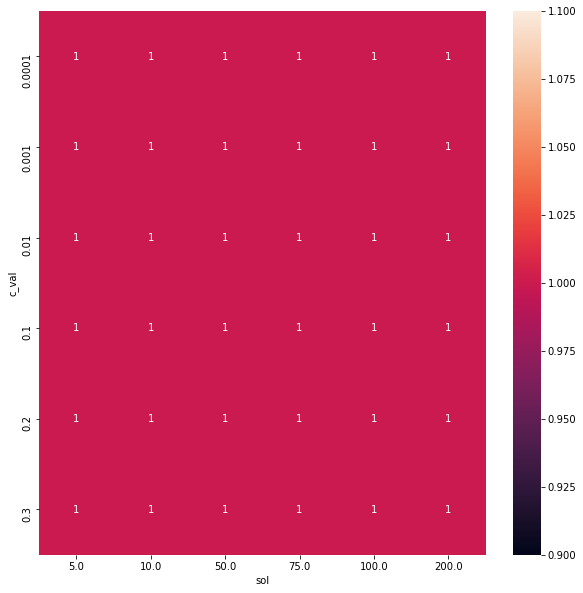

In [23]:
counter = 0
d = pd.DataFrame(columns = ['c_val','sol','score'])
for i in learning_rate:
    for j in estimators:
        d.loc[counter,'score'] = train_auc[counter]
        d.loc[counter,'c_val'] = i
        d.loc[counter,'sol'] = j
        counter+=1
d = d.astype(np.float64)
result = d.pivot(index='c_val', columns='sol', values='score')
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(result, annot=True,ax=ax)

plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

neigh = GradientBoostingClassifier()
parameters = {'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],'n_estimators' : [5,10,50, 75, 100, 200]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc',n_jobs = -1,verbose = True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 21.6min finished


In [25]:
clf.best_params_

{'learning_rate': 0.0001, 'n_estimators': 5}

In [26]:
clf = GradientBoostingClassifier(learning_rate=0.0001,n_estimators=5)
clf.fit(X_tr, y_train)
from scipy.sparse import vstack
y_tr_pred = clf.predict_proba(vstack((X_tr,X_cr)).tocsr())[:,1]
y_test_pred = clf.predict_proba(X_te)[:,1]


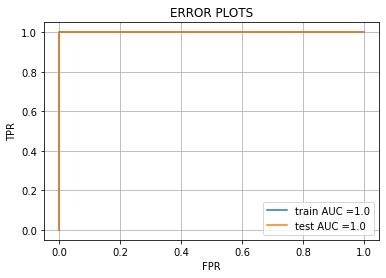

In [27]:
train_fpr, train_tpr, tr_thresholds = roc_curve(np.concatenate((y_train,y_cv),axis=0), y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [224]:
y_te_pred = clf.predict(X_te)

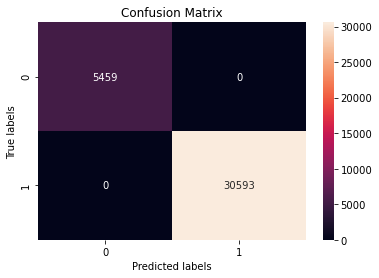

In [225]:
tn = 0
fn = 0
fp = 0
tp = 0
for i,j in zip(y_test,y_te_pred):
    if(i == j and i ==0):
        tn+=1
    elif(i ==j and i==1):
        tp+=1
    elif(i!=j and j==1):
        fp+=1
    elif(i!=j and j ==0):
        fn+=1

n = np.array([tn,fp,fn,tp])
n = n.reshape(-1,2)

ax= plt.subplot()
sns.heatmap(n, annot=True, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

In [226]:
#Task2
from scipy.sparse import hstack
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

X_tr = hstack((tfidf_w2v_vectors_tr_essay, tfidf_w2v_vectors_tr_title, X_train_state_respcod, X_train_teacher_respcod, X_train_grade_respcod,X_train_clean_respcod,X_train_clean_sub_respcod, X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm,sentiment_data_list[0])).tocsr()
X_cr = hstack((tfidf_w2v_vectors_cv_essay,tfidf_w2v_vectors_cv_title, X_cv_state_respcod, X_cv_teacher_respcod, X_cv_grade_respcod,X_cv_clean_respcod,X_cv_clean_sub_respcod, X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects_norm,sentiment_data_list[1])).tocsr()
X_te = hstack((tfidf_w2v_vectors_te_essay,tfidf_w2v_vectors_te_title, X_test_state_respcod, X_test_teacher_respcod, X_test_grade_respcod,X_test_clean_respcod,X_test_clean_sub_respcod, X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm,sentiment_data_list[2])).tocsr()

print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_cr.shape, y_cv.shape)
print(X_te.shape, y_test.shape)
print("="*100)



Final Data matrix
(49041, 611) (49041,)
(24155, 611) (24155,)
(36052, 611) (36052,)


In [229]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

neigh = GradientBoostingClassifier()
parameters = {'max_depth' : [1, 3, 10, 30],'n_estimators' : [5, 10,15,20]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc',n_jobs = -1,verbose = True)
clf.fit(X_tr, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 10.9min finished


In [230]:
clf.best_params_

{'max_depth': 1, 'n_estimators': 5}

In [231]:
clf = GradientBoostingClassifier(max_depth=1,n_estimators=5)
clf.fit(X_tr, y_train)
from scipy.sparse import vstack
y_tr_pred = clf.predict_proba(vstack((X_tr,X_cr)).tocsr())[:,1]
y_test_pred = clf.predict_proba(X_te)[:,1]


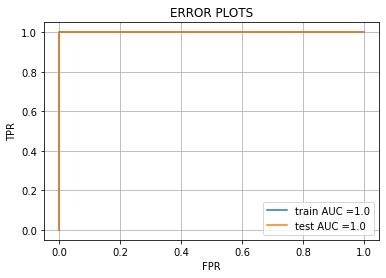

In [232]:
train_fpr, train_tpr, tr_thresholds = roc_curve(np.concatenate((y_train,y_cv),axis=0), y_tr_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

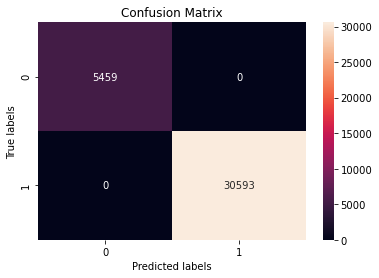

In [233]:
tn = 0
fn = 0
fp = 0
tp = 0
for i,j in zip(y_test,y_te_pred):
    if(i == j and i ==0):
        tn+=1
    elif(i ==j and i==1):
        tp+=1
    elif(i!=j and j==1):
        fp+=1
    elif(i!=j and j ==0):
        fn+=1

n = np.array([tn,fp,fn,tp])
n = n.reshape(-1,2)

ax= plt.subplot()
sns.heatmap(n, annot=True, fmt='g'); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);

In [235]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]

x.add_row(['TFIDF','BRUTE',2,1])

x.add_row(['TFIDFW2V','BRUTE',2,1])
print(x)

+------------+-------+-----------------+-----+
| Vectorizer | Model | Hyper Parameter | AUC |
+------------+-------+-----------------+-----+
|   TFIDF    | BRUTE |        2        |  1  |
|  TFIDFW2V  | BRUTE |        2        |  1  |
+------------+-------+-----------------+-----+


<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions